## **Getting the data:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
folder='https://raw.githubusercontent.com/hh26/EPL-Predictions/master/CSV/'

In [3]:
x_train = pd.read_csv(folder+'XTRAIN.csv')
y_train = pd.read_csv(folder+'YTRAIN.csv')
x_test = pd.read_csv(folder+'XTEST.csv')
y_test = pd.read_csv(folder+'YTEST.csv')
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [4]:
y_train

array(['H', 'H', 'H', ..., 'A', 'H', 'A'], dtype=object)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

In [6]:
x_train.columns

Index(['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted', 'FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential'],
      dtype='object')

## **Class A features alone:**

In [7]:
classAfeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted']

In [8]:
x_train_a=x_train[classAfeatures]
x_test_a=x_test[classAfeatures]

In [9]:
GNB=GaussianNB()
crossvalscores=[]
cvscore=cross_val_score(GNB,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.5057563879210221
Validation Accuracy: 0.513758272378962
Testing Accuracy: 0.471875


<AxesSubplot:>

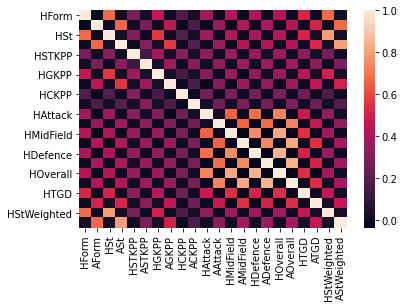

In [10]:
sns.heatmap(x_train_a.corr(method='kendall'))

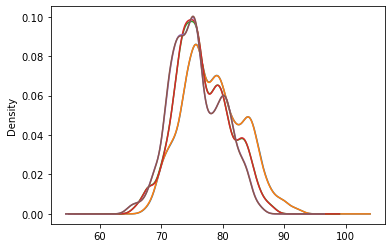

In [11]:
nonGaussianDistcols = ['HAttack', 'AAttack', 'HMidField', 'AMidField','HDefence', 'ADefence']
for col in nonGaussianDistcols:
  x_train_a[col].plot.kde()

In [12]:
x_train_a.drop(nonGaussianDistcols, axis = 1 , inplace = True)
x_test_a.drop(nonGaussianDistcols, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
cvscore=cross_val_score(GNB,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.5043614498644986
Validation Accuracy: 0.5134099616858238
Testing Accuracy: 0.4734375


In [14]:
y_pred=GNB.predict(x_test_a)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[184  52  54]
 [ 69  91  29]
 [ 78  55  28]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [15]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.56      0.63      0.59       290
           A       0.46      0.48      0.47       189
           D       0.25      0.17      0.21       161

    accuracy                           0.47       640
   macro avg       0.42      0.43      0.42       640
weighted avg       0.45      0.47      0.46       640



In [16]:
prob_pred = GNB.predict_proba(x_test_a)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.25546833178732237


In [17]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [18]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


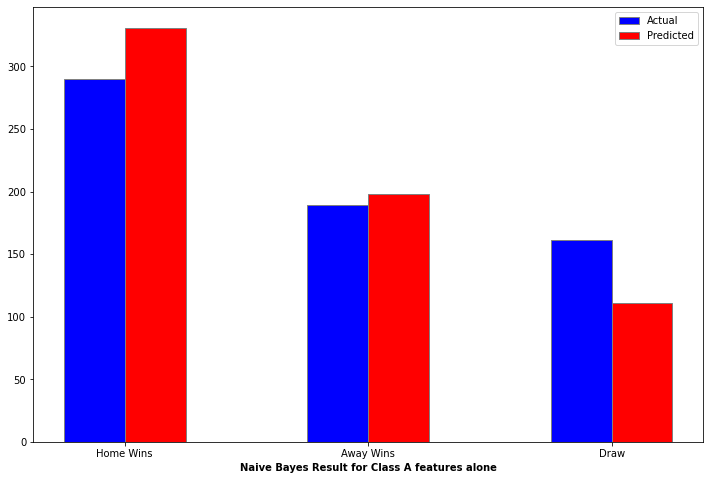

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('Naive Bayes Result for Class A features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

## **Class B features alone:**

In [20]:
classBfeatures=['FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential']

In [21]:
x_train_b=x_train[classBfeatures]
x_test_b=x_test[classBfeatures]

In [22]:
GNB=GaussianNB()
crossvalscores=[]
cvscore=cross_val_score(GNB,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_b,y_test)))

Cross Validation Score for Class A features: 0.5148095722028649
Validation Accuracy: 0.5179380006966214
Testing Accuracy: 0.490625


<AxesSubplot:>

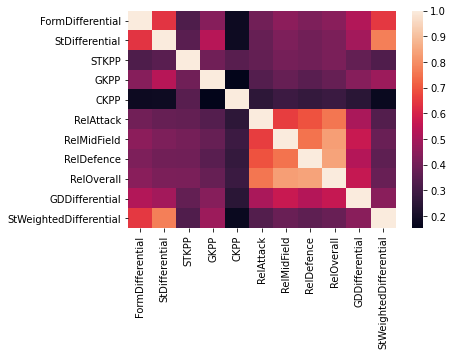

In [23]:
sns.heatmap(x_train_b.corr(method='kendall'))

In [24]:
cols1=['StDifferential','RelAttack','RelMidField','RelDefence']
x_train_b.drop(cols1, axis = 1 , inplace = True)
x_test_b.drop(cols1, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
cvscore=cross_val_score(GNB,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_b,y_test)))

Cross Validation Score for Class A features: 0.5156836769260551
Validation Accuracy: 0.5210727969348659
Testing Accuracy: 0.5


In [26]:
y_pred=GNB.predict(x_test_b)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[199  55  36]
 [ 64 100  25]
 [ 86  54  21]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [27]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.57      0.69      0.62       290
           A       0.48      0.53      0.50       189
           D       0.26      0.13      0.17       161

    accuracy                           0.50       640
   macro avg       0.43      0.45      0.43       640
weighted avg       0.46      0.50      0.47       640



In [28]:
prob_pred = GNB.predict_proba(x_test_b)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.23883577663464367


In [29]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [30]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


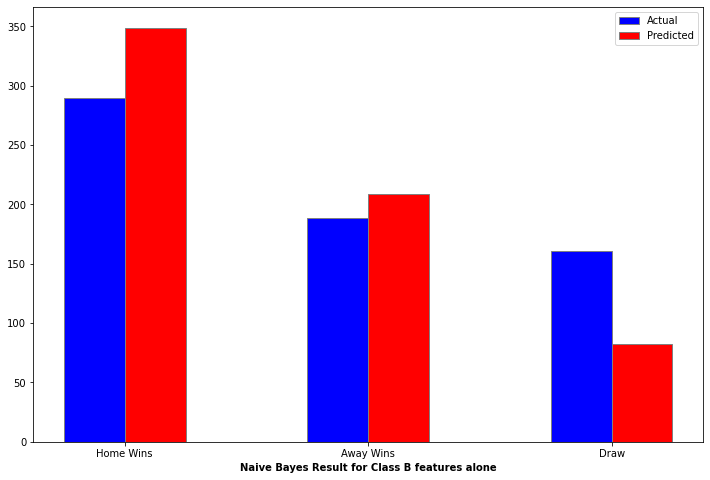

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('Naive Bayes Result for Class B features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()